# 🚀 Day-6: Feature Scaling

---

## 🌟 What is Feature Scaling?

Feature Scaling is the process of **normalizing or standardizing** the range of independent variables in a dataset.  
It helps to bring all features to a **similar scale** without distorting differences in value ranges.

---

## 🎯 Techniques Used:

1. **Min-Max Scaling**
2. **Standardization (Z-Score Normalization)**
3. **Robust Scaling**

---

## 🔥 Summary

| Technique              | Range             | Handles Outliers | When to Use                      |
|----------------------|-------------------|-----------------|-----------------------------------|
| **Min-Max Scaling**  | 0 to 1           | ❌ No          | When no outliers                 |
| **Standardization**  | Mean = 0, SD = 1 | ❌ No          | Normally distributed data        |
| **Robust Scaling**   | Based on IQR     | ✅ Yes         | When outliers present            |

---

✅ **Day-6 Completed!**


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [23]:
data = sns.load_dataset('titanic')
df = pd.DataFrame(data)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [24]:
#handle missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

#min-max scaling(NORMALIZATION)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['age_normalized','fare_normalized']] = scaler.fit_transform(df[['age','fare']])
df[['age','age_normalized','fare','fare_normalized']].head()

C:\Users\sudha\AppData\Local\Temp\ipykernel_15152\2403361912.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\sudha\AppData\Local\Temp\ipykernel_15152\2403361912.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,age,age_normalized,fare,fare_normalized
0,22.0,0.271174,7.2500,0.014151
1,38.0,0.472229,71.2833,0.139136
2,26.0,0.321438,7.9250,0.015469
3,35.0,0.434531,53.1000,0.103644
4,35.0,0.434531,8.0500,0.015713


lets see a scatter plot

for scatter plot we required both x and y parameters

step1: plot for only df['age']

step2: plot for only df['fare']

step3: plot for both before normalized

step4: plot for both after normalized

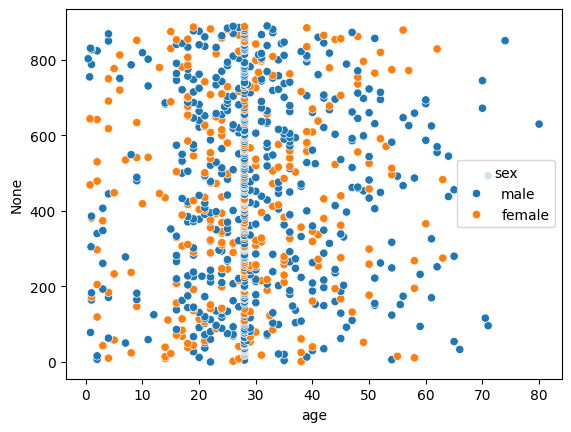

In [25]:
sns.scatterplot(x=df['age'],y=df.index,hue=df['sex'])
plt.show()

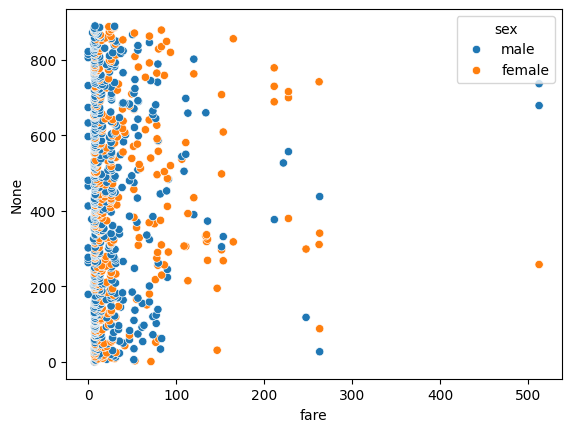

In [26]:
sns.scatterplot(x=df['fare'],y=df.index ,hue=df['sex'])
plt.show()

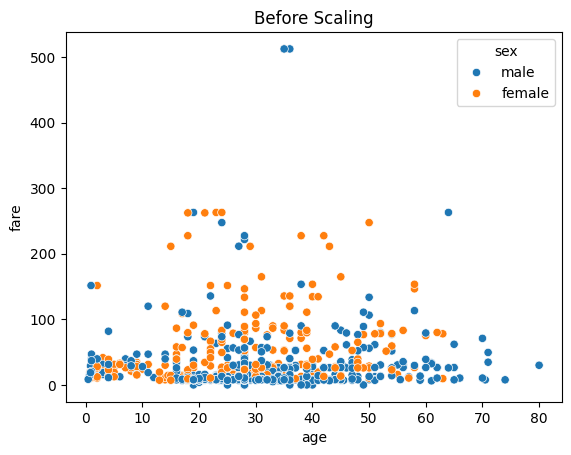

In [27]:
sns.scatterplot(x=df['age'], y=df['fare'],hue=df['sex'])
plt.title('Before Scaling')
plt.show()

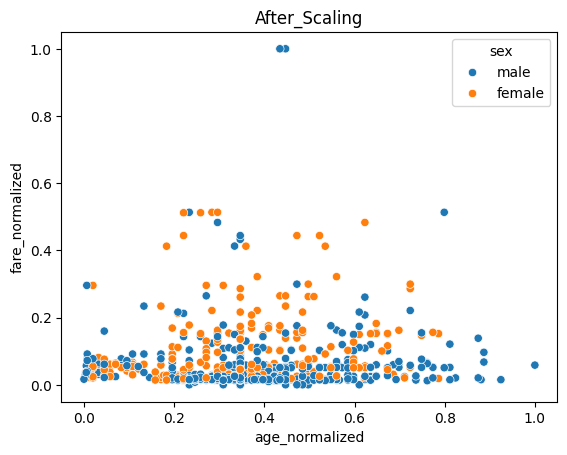

In [28]:
sns.scatterplot(x=df['age_normalized'], y=df['fare_normalized'],hue=df['sex'])
plt.title('After_Scaling')
plt.show()

STANDARDIZATION(Z-score scaling)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age_std','fare_std']] = scaler.fit_transform(df[['age','fare']])
df[['age','age_std','fare','fare_std']].head()


,age,age_std,fare,fare_std
0,22.0,-0.565736,7.2500,-0.502445
1,38.0,0.663861,71.2833,0.786845
2,26.0,-0.258337,7.9250,-0.488854
3,35.0,0.433312,53.1000,0.420730
4,35.0,0.433312,8.0500,-0.486337


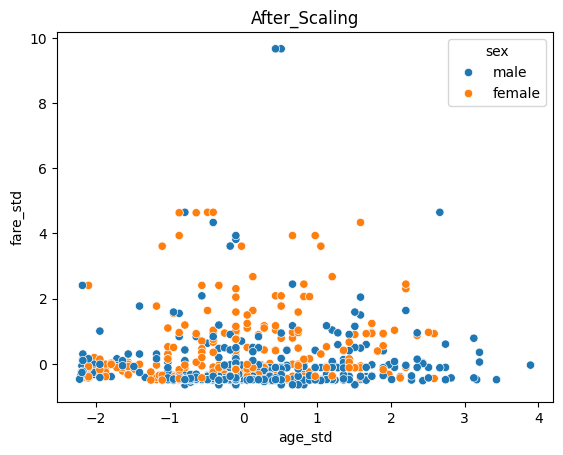

In [30]:
sns.scatterplot(x=df['age_std'], y=df['fare_std'],hue=df['sex'])
plt.title('After_Scaling')
plt.show()

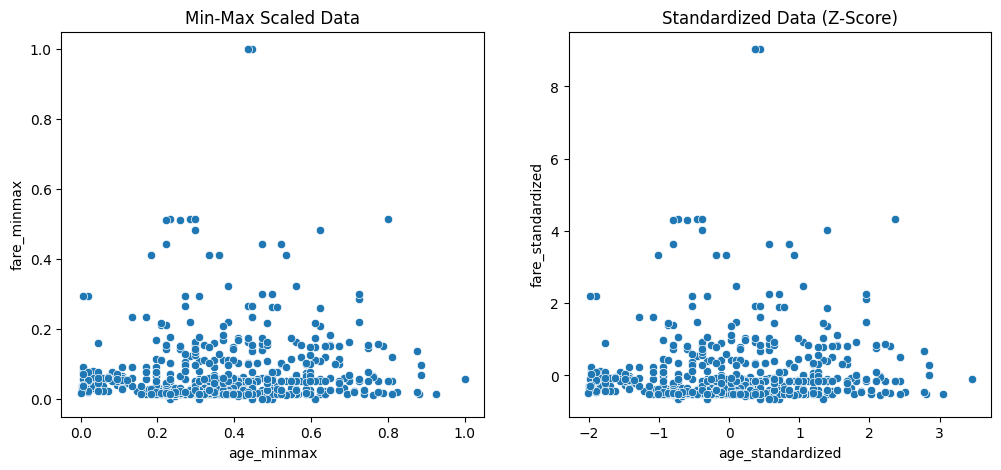

In [31]:
# Load dataset
df = sns.load_dataset('titanic')

# Select numeric columns and drop missing values
df = df[['age', 'fare']].dropna()

# Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
df[['age_minmax', 'fare_minmax']] = minmax_scaler.fit_transform(df[['age', 'fare']])

# Apply Standardization
std_scaler = StandardScaler()
df[['age_standardized', 'fare_standardized']] = std_scaler.fit_transform(df[['age', 'fare']])

# Plot Min-Max Scaled Data
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df['age_minmax'], y=df['fare_minmax'])
plt.title("Min-Max Scaled Data")

# Plot Standardized Data
plt.subplot(1,2,2)
sns.scatterplot(x=df['age_standardized'], y=df['fare_standardized'])
plt.title("Standardized Data (Z-Score)")

plt.show()


ROBUST SCALING 

In [32]:
from sklearn.preprocessing import RobustScaler
df = pd.DataFrame(sns.load_dataset('titanic'))

# Selecting numerical columns
num_features = ['age', 'fare', 'parch', 'sibsp']

# Dropping rows with missing values in selected columns
df = df.dropna(subset=num_features)

scaler = RobustScaler()
df[['age_scaled','fare_scaled','parch_scaled','sibsp_scaled']] = scaler.fit_transform(df[['age','fare','parch','sibsp']])

df[['age_scaled','fare_scaled','parch_scaled','sibsp_scaled']]

,age_scaled,fare_scaled,parch_scaled,sibsp_scaled
0,-0.335664,-0.335309,0.0,1.0
1,0.559441,2.193153,0.0,1.0
2,-0.111888,-0.308655,0.0,0.0
3,0.391608,1.475155,0.0,1.0
4,0.391608,-0.303720,0.0,0.0
...,...,...,...,...
885,0.615385,0.528462,5.0,0.0
886,-0.055944,-0.108261,0.0,0.0
887,-0.503497,0.563013,0.0,0.0
889,-0.111888,0.563013,0.0,0.0


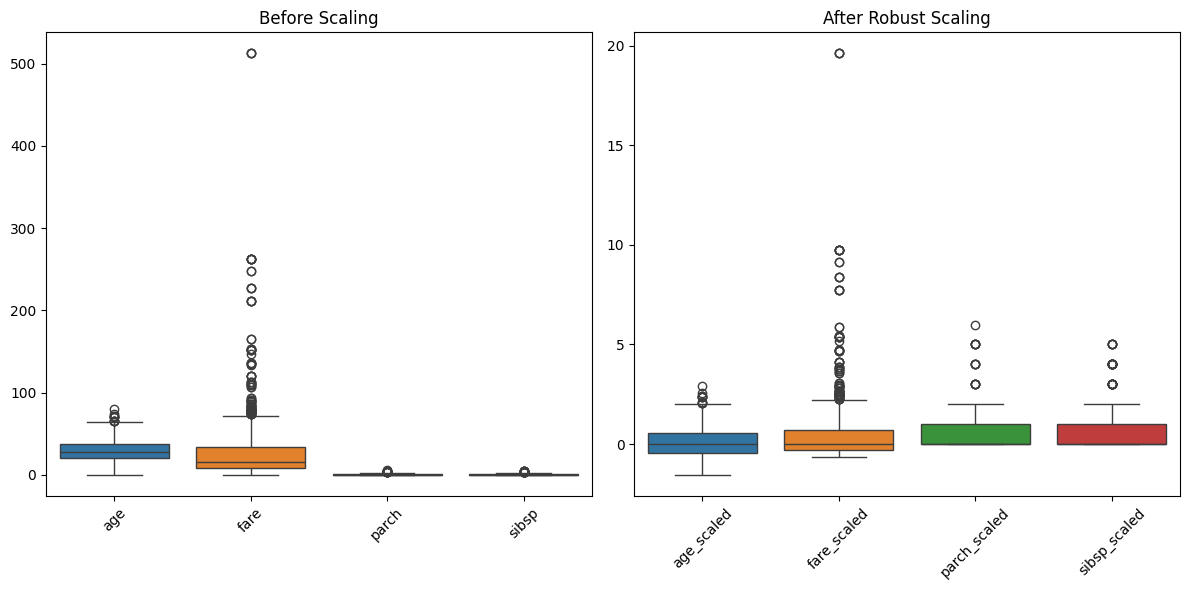

In [35]:
# Set figure size
plt.figure(figsize=(12, 6))

# Before Scaling
plt.subplot(1, 2, 1)
sns.boxplot(data=df[num_features])
plt.title("Before Scaling")
plt.xticks(rotation=45)

# After Scaling
plt.subplot(1, 2, 2)
sns.boxplot(data=df[['age_scaled', 'fare_scaled', 'parch_scaled', 'sibsp_scaled']])
plt.title("After Robust Scaling")
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

